In [2]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel(r'C:\Users\e196315\Documents\RedLine\2G-20041040\Elcorcobo\Copy of RE_Log20210517_full.xlsx')


print("Data Loaded OK")

Data Loaded OK


In [5]:
data.columns

Index(['Time Stamp', 'WLR [%]', 'Well#', 'Status', 'XL [-]', 'WLR wma [%]',
       'PC1 [nA]', 'PC2 [nA]', 'PC3 [nA]', 'PC4 [nA]', 'Tb [C]', 'Tp [C]',
       ' 4-20mA In [counts]', 'Freq. In [Hz]', 'Flow Rate', 'Test WC [%]',
       'Test State', 'Test State Duration [mins]',
       'Test Oil Vol Projected (Daily)', 'Test WaterVol Projected (Daily)',
       'Test Oil Mass Projected (Hourly)',
       'Test Water Mass Projected (Hourly)', 'Test Oil Vol (cumu)',
       'Test Water Vol (cumu)', 'Test Oil Mass(cumu)',
       'Test Water Mass (cumu)'],
      dtype='object')

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

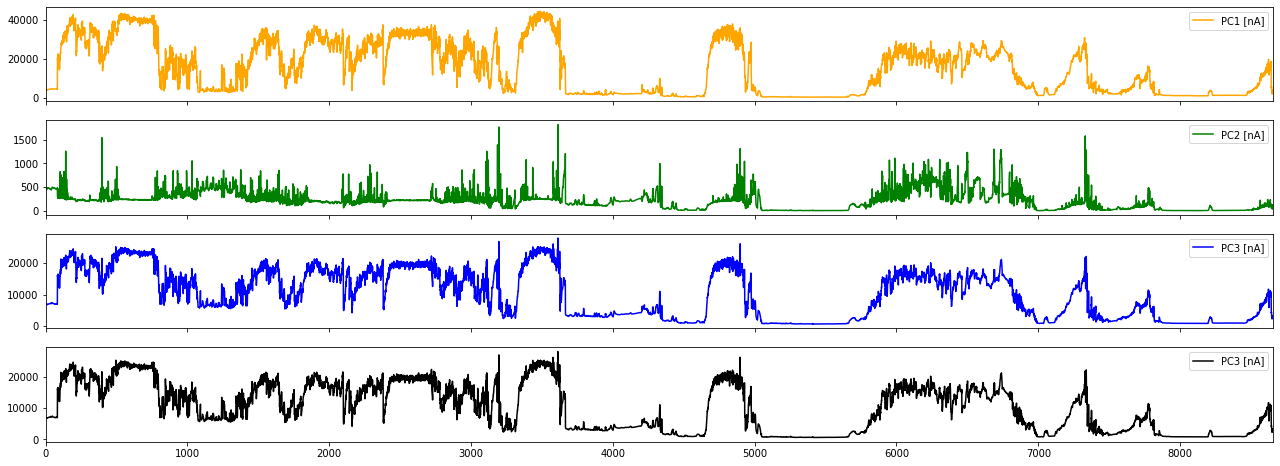

In [4]:
x1 = data.copy()


fig, ax = plt.subplots(4,figsize=(22,8),sharex=True)


x1.plot( y='PC1 [nA]',color='orange',ax=ax[0])
x1.plot( y='PC2 [nA]',color='green',ax=ax[1])
x1.plot( y='PC3 [nA]',color='blue',ax=ax[2])
x1.plot( y='PC3 [nA]',color='black',ax=ax[3])
      
plt.show()

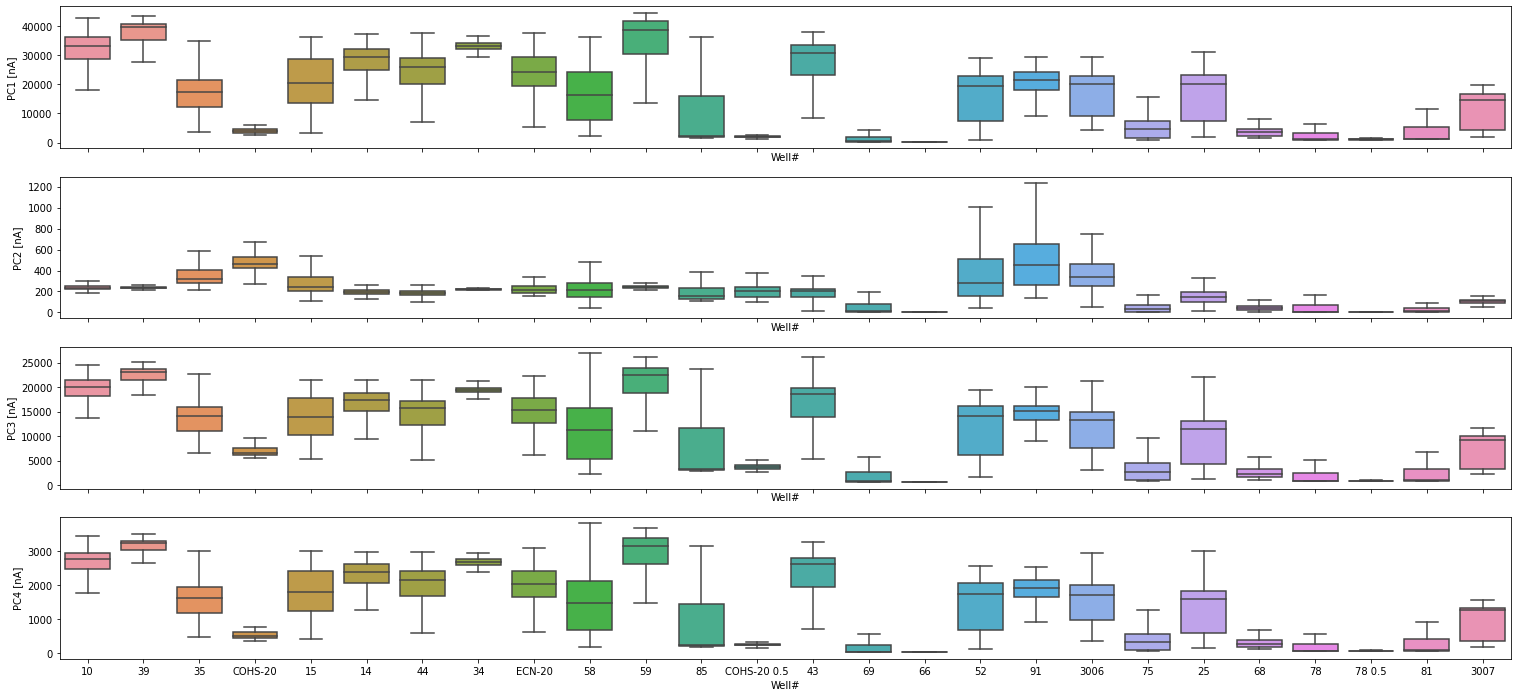

In [3]:
fig, ax = plt.subplots(4,figsize=(26,12),sharex=True)
sns.boxplot(y='PC1 [nA]', x='Well#', data=x1, orient='v' ,showfliers = False, ax=ax[0])
sns.boxplot(y='PC2 [nA]', x='Well#', data=x1, orient='v' , showfliers = False,ax=ax[1])
sns.boxplot(y='PC3 [nA]', x='Well#', data=x1, orient='v' , showfliers = False,ax=ax[2])
sns.boxplot(y='PC4 [nA]', x='Well#', data=x1, orient='v' , showfliers = False,ax=ax[3])
plt.show()

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


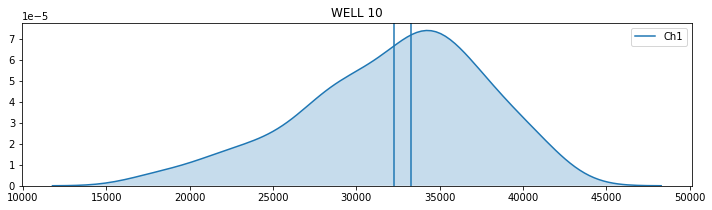

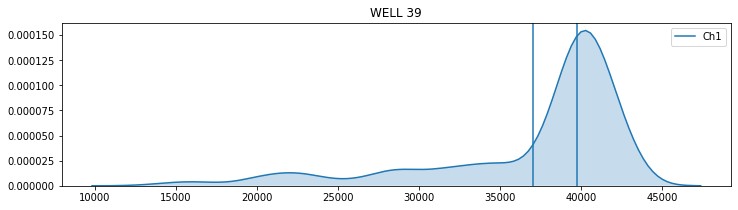

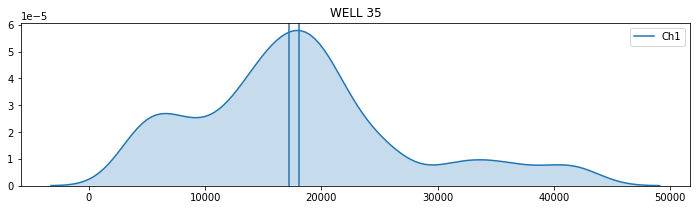

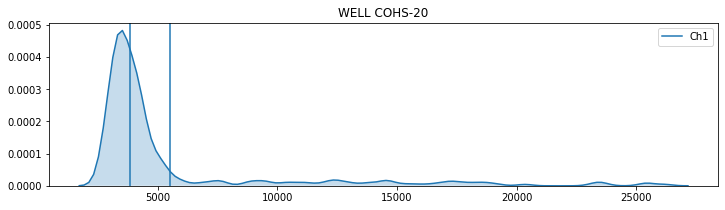

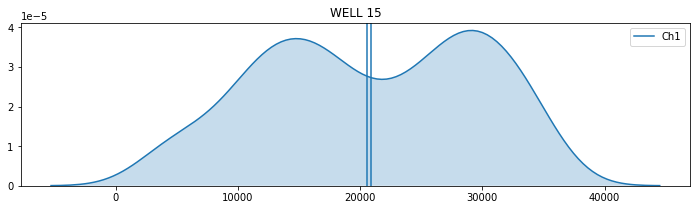

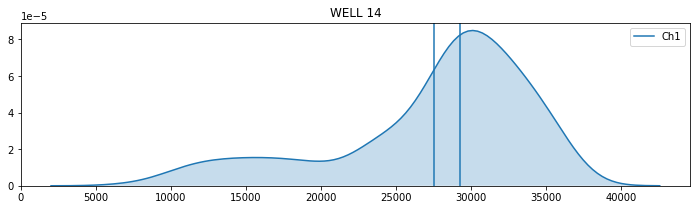

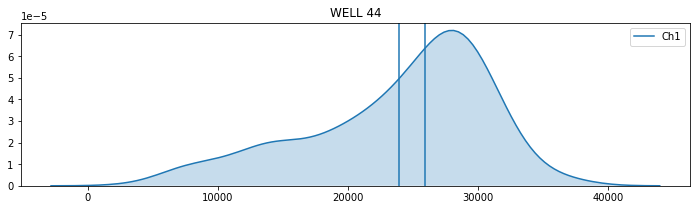

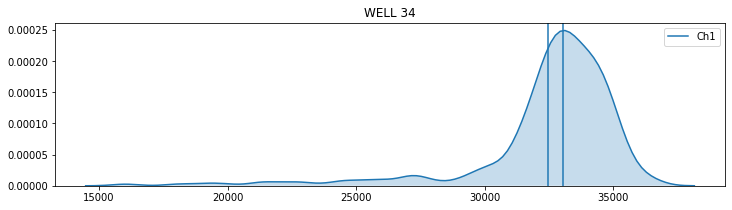

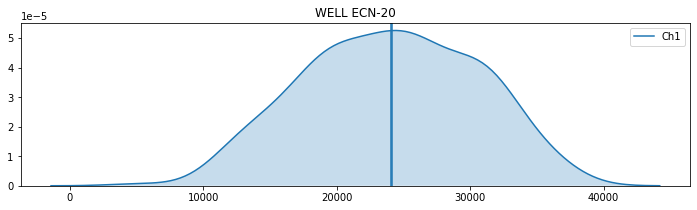

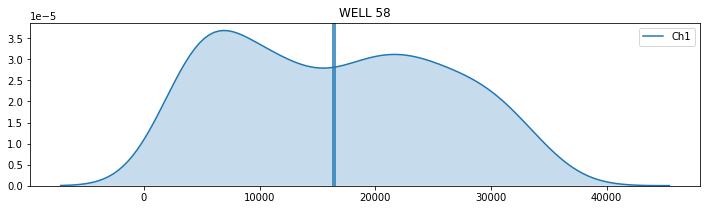

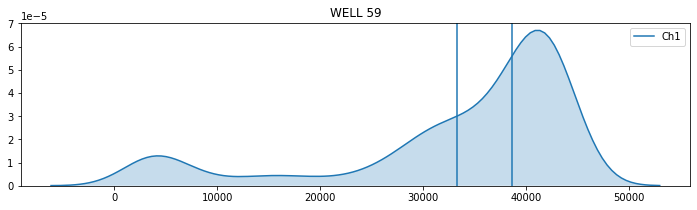

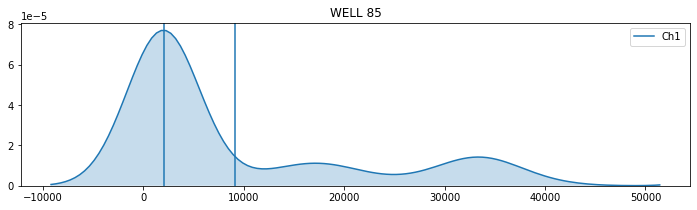

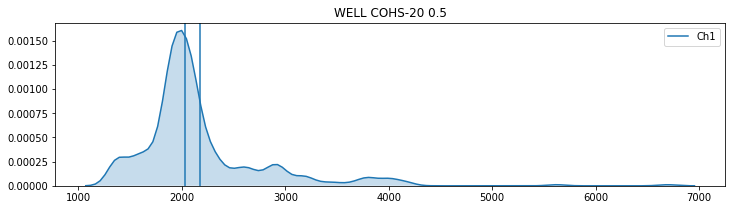

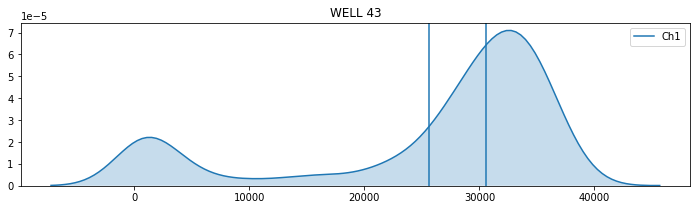

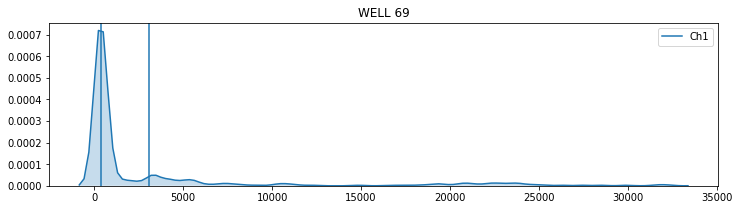

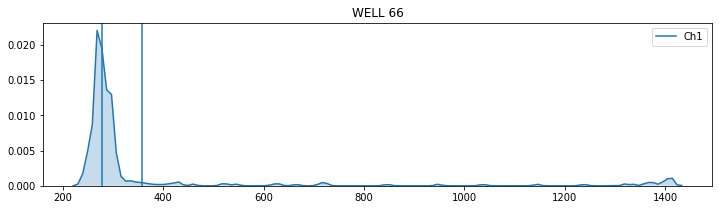

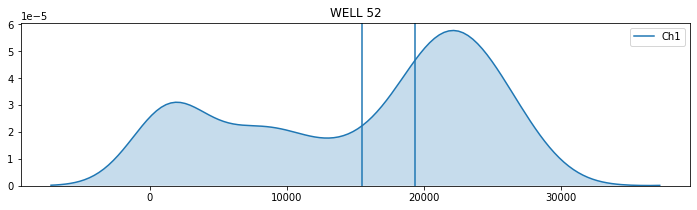

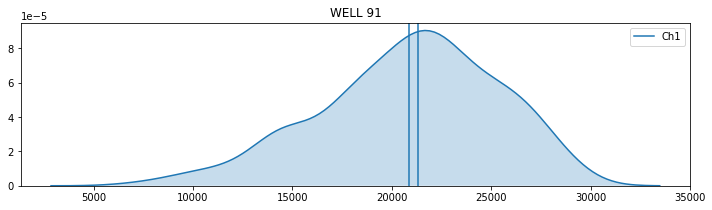

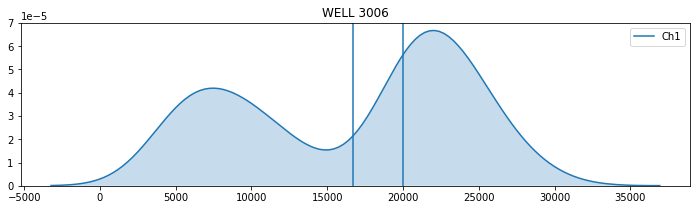

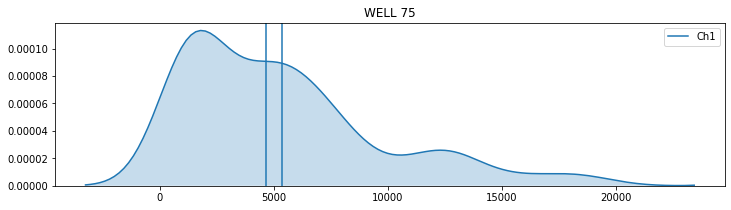

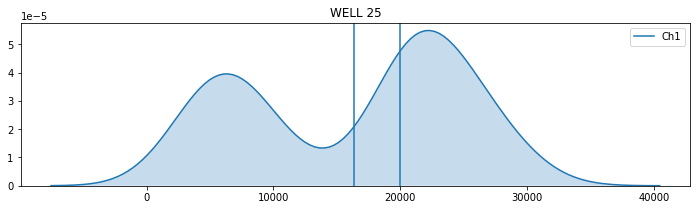

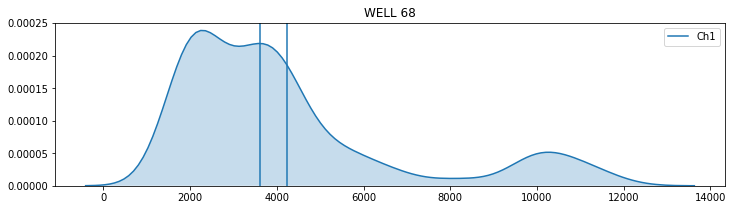

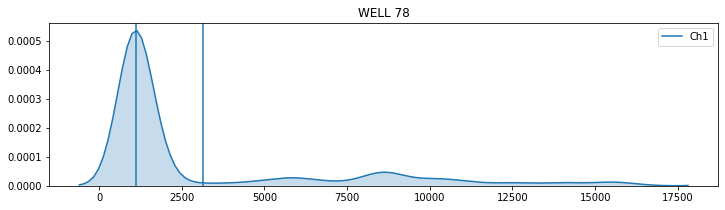

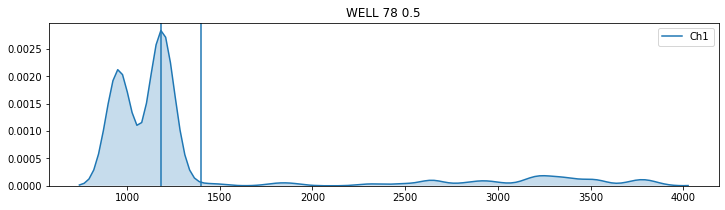

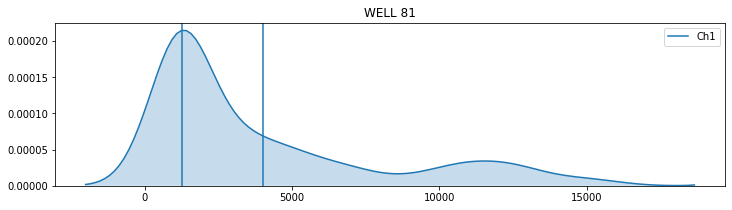

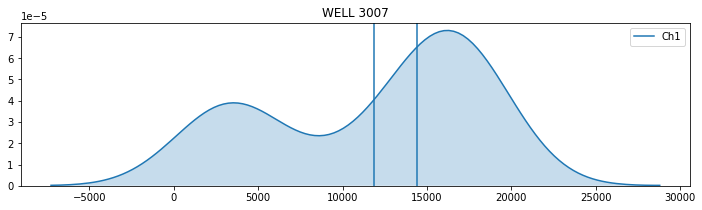

In [5]:
x2 = data.copy()
x2.dropna(axis=0, inplace=True)
#print(w)

for w in x2['Well#'].unique():
    r = x2[x2['Well#']==w]
    fig, ax = plt.subplots(1,figsize=(12,3))
    plt.title("WELL " + str(w))
    m = r['PC1 [nA]'].mean()
    n = r['PC1 [nA]'].median()
    plt.axvline(m, 0,15)
    plt.axvline(n, 0,15)

    #plt.ylim(0, 1.5)
    sns.kdeplot(r['PC1 [nA]'], shade=True, label='Ch1')
    

In [19]:
x = x1.groupby('Well#')['WLR [%]', 'XL [-]', 'WLR wma [%]','PC1 [nA]', 'PC2 [nA]', 'PC3 [nA]', 'PC4 [nA]'].median()
x.reset_index(level=0, inplace=True)
x.to_csv(r'C:\Users\e196315\Documents\RedLine\2G-20041040\Elcorcobo\groupby_median.csv')

In [18]:
x = x1.groupby('Well#')['WLR [%]', 'XL [-]', 'WLR wma [%]','PC1 [nA]', 'PC2 [nA]', 'PC3 [nA]', 'PC4 [nA]'].mean()
x.reset_index(level=0, inplace=True)
x.to_csv(r'C:\Users\e196315\Documents\RedLine\2G-20041040\Elcorcobo\groupby_mean.csv')